## Importing The necessary machine learnimng Libraries

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
import keras
import cv2
import glob
import PIL
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation, Dropout
from sklearn.model_selection import train_test_split

In [49]:
image_dir = pathlib.Path('Data/cell_images')
image_count = len(list(image_dir.glob('*/*.png')))
print(image_count)

27558


Parasitized Sample:



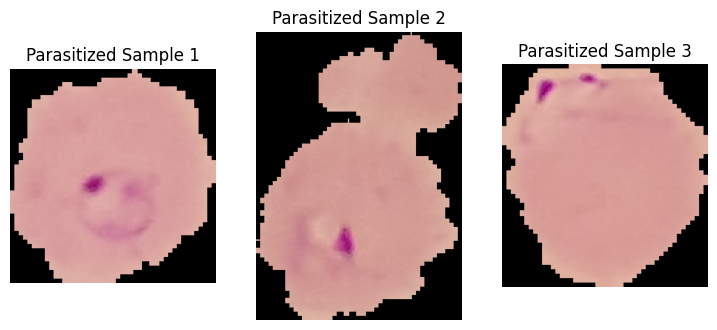

Uninfected Sample:



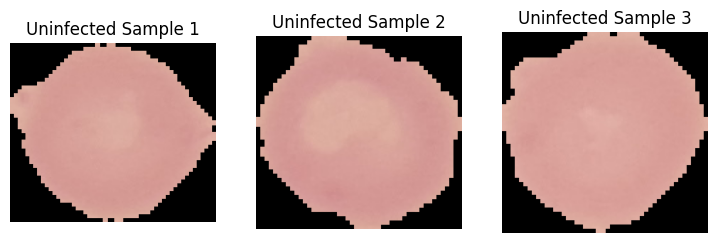

In [50]:

# Define a helper function to read and display images
def display_images_from_folder(folder_path, title):
    images = glob.glob(f'{folder_path}/*.png')  # Adjust the extension if necessary
    plt.figure(figsize=(9, 9))
    for i, image_path in enumerate(images[:3]):  # Display first 3 images
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.subplot(1, 3, i+1)  # 1 row, 3 columns
        plt.imshow(img)
        plt.title(f"{title} Sample {i+1}")
        plt.axis('off')
    plt.show()

print("Parasitized Sample:\n")
display_images_from_folder('Data/cell_images/Parasitized', 'Parasitized')

print("Uninfected Sample:\n")
display_images_from_folder('Data/cell_images/Uninfected', 'Uninfected')


In [64]:
img_dir="cell_images"  
img_size=70

def load_img_data(path):
    image_files = glob.glob(os.path.join(path, "Parasitized/*.png")) + \
                  glob.glob(os.path.join(path, "Uninfected/*.png"))
    X, y = [], []
    for image_file in image_files:
        # 0 for uninfected and 1 for infected
        label = 0 if "Uninfected" in image_file else 1
        # load the image in gray scale
        img_arr = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
        # resize the image to (70x70)
        img_resized = cv2.resize(img_arr, (img_size, img_size))
        X.append(img_resized)
        y.append(label)
    return X, y

In [65]:
# load the data
X, y = load_img_data(image_dir)
# reshape to (n_samples, 70, 70, 1) (to fit the NN)
X = np.array(X).reshape(-1, img_size, img_size, 1)
# scale pixels from the range [0, 255] to [0, 1] 
# to help the neural network learn much faster
X = X / 255 

# shuffle & split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
print("Total training samples:", X_train.shape)
print("Total validation samples:", X_test.shape[0])

Total training samples: (24802, 70, 70, 1)
Total validation samples: 2756


## Building the CNN Model

In [66]:
# IMPLEMTING CNN 

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))
model.summary()

d:\KIMZ\PROJECTS\Malaria-Detection-Model-Using-TensorFlow\virtual_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 68, 68, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 68, 68, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,489 (1.07 MB)

 Trainable params: 279,489 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

### Compliling the Model

In [67]:

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

### Fitting the model

In [74]:
# train the model with 3 epochs, 64 batch siz
epochs = 3
history = model.fit(X_train, np.array(y_train), batch_size=64, epochs=3, validation_split=0.2)


Epoch 1/3
311/311 ━━━━━━━━━━━━━━━━━━━━ 57s 184ms/step - accuracy: 0.9648 - loss: 0.0965 - val_accuracy: 0.9355 - val_loss: 0.1974
Epoch 2/3
311/311 ━━━━━━━━━━━━━━━━━━━━ 58s 188ms/step - accuracy: 0.9666 - loss: 0.0930 - val_accuracy: 0.9498 - val_loss: 0.1491
Epoch 3/3
311/311 ━━━━━━━━━━━━━━━━━━━━ 58s 186ms/step - accuracy: 0.9750 - loss: 0.0737 - val_accuracy: 0.9492 - val_loss: 0.1561


### Model Evaluation

In [70]:

loss, accuracy = model.evaluate(X_test, np.array(y_test), verbose=0)
print(f"Testing on {len(X_test)} images, the results are\n Accuracy: {accuracy} | Loss: {loss}")

Testing on 2756 images, the results are
 Accuracy: 0.9470247030258179 | Loss: 0.14641073346138


### Visualizing the model accuracy and loss

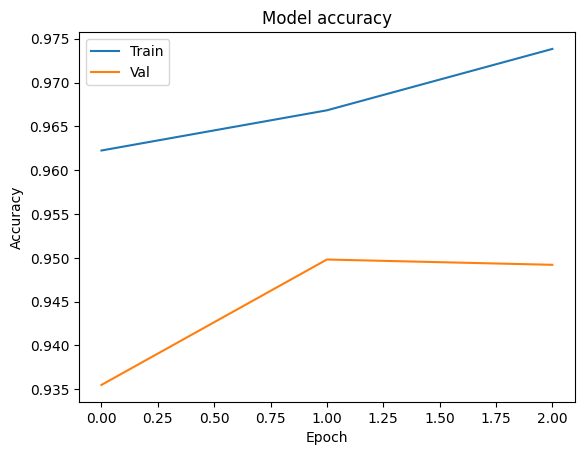

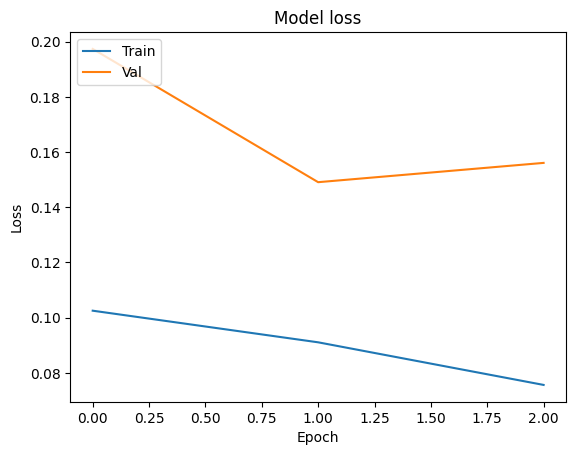

In [75]:


# Plot training & validation accuracy values
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


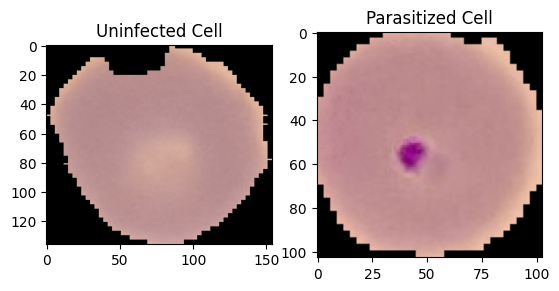

In [71]:
# testing some images
uninfected_cell = "Data/cell_images/Uninfected/C1_thinF_IMG_20150604_104919_cell_86.png"
infected_cell = "Data/cell_images/Parasitized/C33P1thinF_IMG_20150619_121435a_cell_173.png"

_, ax = plt.subplots(1, 2)
ax[0].imshow(plt.imread(uninfected_cell))
ax[0].title.set_text("Uninfected Cell")
ax[1].imshow(plt.imread(infected_cell))
ax[1].title.set_text("Parasitized Cell")
plt.show()

In [83]:
# LOAD IMAGES FOR PROCESSING

img_arr_uninfected = cv2.imread(uninfected_cell, cv2.IMREAD_GRAYSCALE)
img_arr_infected = cv2.imread(infected_cell, cv2.IMREAD_GRAYSCALE)
# resize the images to (70x70)
img_arr_uninfected = cv2.resize(img_arr_uninfected, (img_size, img_size))
img_arr_infected = cv2.resize(img_arr_infected, (img_size, img_size))
# scale to [0, 1]
img_arr_infected = img_arr_infected / 255
img_arr_uninfected = img_arr_uninfected / 255
# reshape to fit the neural network dimensions
# (changing shape from (70, 70) to (1, 70, 70, 1))
img_arr_infected = img_arr_infected.reshape(1, *img_arr_infected.shape)
img_arr_infected = np.expand_dims(img_arr_infected, axis=3)
img_arr_uninfected = img_arr_uninfected.reshape(1, *img_arr_uninfected.shape)
img_arr_uninfected = np.expand_dims(img_arr_uninfected, axis=3)

In [84]:
# perform inference
infected_result = model.predict(img_arr_infected)[0][0]
uninfected_result = model.predict(img_arr_uninfected)[0][0]
print(f"Infected: {infected_result}")
print(f"Uninfected: {uninfected_result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Infected: 0.999998152256012
Uninfected: 0.02767137438058853


### Saving the model

In [88]:
# save the model & weights
model.save("malaria-model-cnn.h5")

In [89]:

%cd "D:/KIMZ/PROJECTS/Malaria-Detection-Model-Using-TensorFlow/Model"
model.save('malaria_prediction_model.keras')

D:\KIMZ\PROJECTS\Malaria-Detection-Model-Using-TensorFlow\Model


d:\KIMZ\PROJECTS\Malaria-Detection-Model-Using-TensorFlow\virtual_env\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
